# PFDA-Project-2019

## Programming for Data Analysis Project 2019 - Child Birth

### Simulating Data


### Child Birth Ireland

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from here.

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 200


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as can be seen [here.](https://ourworldindata.org/gender-ratio) As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper related to the above website on gender ratios can be found [here](https://www.pnas.org/content/116/19/9303), for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

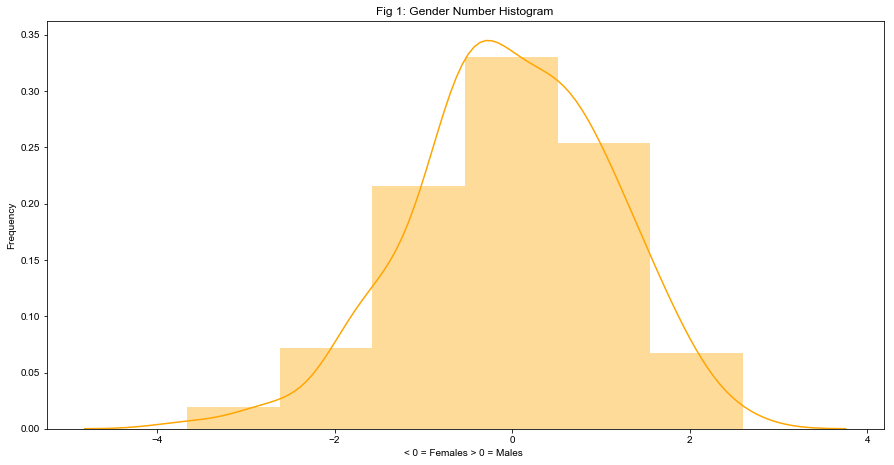

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('< 0 = Females > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0        -1.729344      Female
1        -2.027175      Female
2        -0.610601      Female
3        -0.549243      Female
4         0.606674        Male
5        -0.622433      Female
6         1.097535        Male
7         0.520411        Male
8         1.620411        Male
9         0.676512        Male
10        1.144781        Male
11        1.118596        Male
12       -0.451643      Female
13        0.769848        Male
14       -0.615795      Female
15       -0.878076      Female
16        0.472780        Male
17       -1.756281      Female
18        0.486652        Male
19       -0.170457      Female
20       -1.166949      Female
21        1.153245        Male
22       -0.455205      Female
23       -0.519492      Female
24       -0.047157      Female
25        1.985089        Male
26       -0.063799      Female
27        0.775327        Male
28        0.431984        Male
29        0.553662        Male
..             ...         ...
170     

In [7]:
df = birth_data.groupby(['gender_text'], sort=False).size().reset_index(name='Count')
print (df)

  gender_text  Count
0      Female    103
1        Male     97
